In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd

# df = pd.read_csv('/gdrive/My Drive/dataset-pgs.csv') # Drive Natasha
df = pd.read_excel('/gdrive/My Drive/Natasha/Book2.xlsx', sheet_name='Levantamento PGs')

In [ ]:
df['Orientador'].head()

0          Esteves, Milton Júnior
1         Frizzera, Kleber Perini
2    Almeida, Renata\nHermanny de
3           Rocha, Bruno\nMassara
4         Ribeiro,\nNelson Pôrto.
Name: Orientador, dtype: object

In [ ]:
df = df.fillna("")
df['TAGS'] = df['TAGS'].apply(lambda row: row.split('/'))

In [ ]:
df['TAGS'] = df['TAGS'].apply(lambda row: [word.strip() for word in row])
df['TAGS'] = df['TAGS'].apply(lambda row: [word.lower() for word in row])

df['LUGAR'] = df['LUGAR'].apply(lambda row: row.strip())
df['LUGAR'] = df['LUGAR'].apply(lambda row: row.lower())

df['definição DNC'] = df['definição DNC'].apply(lambda row: row.strip())
df['definição DNC'] = df['definição DNC'].apply(lambda row: row.lower())

df['Orientador'] = df['Orientador'].apply(lambda row: row.strip())
df['Orientador'] = df['Orientador'].apply(lambda row: row.lower())
df['Orientador'] = df['Orientador'].apply(lambda row: row.replace('\n', ' '))

df['Ano da publicação'] = df['Ano da publicação'].apply(lambda row: int(row or row.strip() or 9999))

In [ ]:
df

Titulo  ...                     LUGAR
0    O Sabor da Arquitetura : a\ninfluência da arqu...  ...                       n/d
1                O vago e o específico das\nexposições  ...                       n/d
2          Corpo inverso: outros\nmovimentos possíves!  ...                       n/d
3    Chip: centro de integração\npopular uma propos...  ...            enseada do suá
4    Arquitetas do Movimento\nModerno Brasileiro (1...  ...                       n/d
..                                                 ...  ...                       ...
918  Arquitetura Bioclimática em habitação de Inter...  ...              porto alegre
919           Museu do Som: uma experiência do ouvir\t  ...  parque paulo cesar vinha
920  Táticas Periféricas: Movimentos sobre modos de...  ...                   vitória
921  Eficiência energética na arquitetura: regulame...  ...             santo antônio
922            Centro de Solidariedade Intergeracional  ...         centro de vitória

[923 rows x 9 columns]

## Análise das TAGs

In [ ]:
set_tags = set()
df['TAGS'].apply(lambda row: set_tags.update(row))
set_tags = sorted(set_tags)

In [ ]:
list_of_tags = df['TAGS'].to_list()
list_of_tags

for i in set_tags:
    sum = 0
    for row in list_of_tags:
        if i in row:
            sum += 1
    
    print(i, sum)

 48
abandonado 1
abrigo 2
academia 1
acessibilidade 12
acolhimento 1
acupuntura urbano 1
adoção de animais 1
aeroporto 5
africana 1
agrícola 4
agência bancária 1
akatu 1
alta padrão 1
alveneria estrutural 1
ambulantes 1
andre carloni 1
antenor guimarães 1
antiguidade 1
análise 197
apart-hotel 1
apartamento 1
apartamentos flexíveis 1
aplicabilidade 1
apoio psicosocial 1
aquaviário 1
aquário 1
arborização 2
arena 1
arena multiuso 1
arquitetura 43
arquitetura colonial 1
arquitetura contemporânea 3
arquitetura e segurança 1
arquitetura efêmera 1
arquitetura histórica 1
arquitetura militar 1
arquitetura moderna 1
arquitetura modular 2
arquitetura religiosa 1
arquitetura virtual 1
arranha-céus 1
arte 14
arte sacra 1
ashrae 1
assembléia de deus 2
assentamento 1
assistência técnica 2
associação de idosos 1
atendimento socioeducativo 1
aterro 1
autismo 1
automação 1
avaliação 1
aço 3
açucareiro 1
bahá'í 1
bairro 1
bambu 1
batista 2
baía 10
biblioteca 6
bim 3
bioclimático 15
blocos de solo-cimen

In [ ]:
from collections import defaultdict

first_tag = defaultdict(lambda: 0)

In [ ]:
from collections import defaultdict
import numpy as np

data = defaultdict(lambda: np.zeros[()])
for i in df['TAGS']:
    first_tag[i[0]] += 1

print(first_tag)

defaultdict(<function <lambda> at 0x7fd4cd522c80>, {'análise': 180, 'ensaio': 16, 'projeto': 553, 'requalificação': 15, 'intervenção': 7, 'levantamento': 7, 'ensaio projetual': 14, 'investigação': 1, 'intervenções pontuais': 2, 'diretrizes': 10, '': 46, 'estrutura': 1, 'teoria': 1, 'reestruturação': 1, 'metodologia de projeto': 3, 'revitalização': 2, 'planejamento': 7, 'patrimônio imateriais': 1, 'avaliação': 1, 'intervenções': 1, 'entrevista': 1, 'orçamento': 1, 'revisão bibliográfica': 1, 'sig': 1, 'loteamento': 2, 'estudo': 2, 'reflexões': 2, 'desenvolvimento': 1, 'restauro': 3, 'sistema construtivo': 2, 'campi universitário': 1, 'planejamento territorial': 1, 'itapuã': 1, 'metodologia': 2, 'aplicabilidade': 1, 'bim': 2, 'regeneração': 1, 'preservação': 1, 'manual': 2, 'rede de contatos': 1, 'desempenho térmico': 2, 'projeto luminotécnico': 5, 'reforma': 2, 'wood frame': 1, 'light steel frame': 1, 'estrutura metálica': 1, 'ficção': 1, 'cenografia': 1, 'proposta': 1, 'materiais': 1, 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
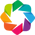

:Chord   [origem,destino]   (contagem)

In [ ]:
import pandas as pd
import numpy as np
import itertools as it
from collections import defaultdict
import warnings

warnings.filterwarnings("ignore")
pd.set_option("max_columns", 30)

import holoviews as hv

hv.extension("bokeh")

tags_relation = defaultdict(lambda: 0)

def compute_tags(row, tags_relation):
    for i in it.combinations(sorted(row), 2):
        tags_relation[i] += 1

_ = df['TAGS'].apply(lambda row: compute_tags(row, tags_relation))

dict_relations = { 'origem': [], 'destino': [], 'contagem': []}

for i in tags_relation.keys():
    dict_relations['origem'] += [i[0]]
    dict_relations['destino'] += [i[1]]
    dict_relations['contagem'] += [tags_relation[i]]

pd_relations = pd.DataFrame(dict_relations)

states = sorted(list(set(pd_relations["origem"].unique().tolist() + pd_relations["destino"].unique().tolist())))
states_dataset = hv.Dataset(pd.DataFrame(states, columns=["State"]))

%opts Chord [height=1500 width=1500 title="Relações Tags dos PGs da Arquitetura" labels="State"]
%opts Chord (node_color="State" node_cmap="Category20" edge_color="origem" edge_cmap='Category20')

hv.Chord((pd_relations, states_dataset))

In [ ]:
pd_relations

origem                        destino  contagem
0                           análise                    arquitetura        30
1                           análise                    restaurante         1
2                       arquitetura                    restaurante         1
3                           análise                           arte         4
4                           análise                      exposição         1
...                             ...                            ...       ...
2012                        projeto                          rtq-r         1
2013                     residência                          rtq-r         1
2014         centro de  (núcleo de)  solidariedade intergeracional         1
2015                        projeto  solidariedade intergeracional         1
2016  solidariedade intergeracional               sustentabilidade         1

[2017 rows x 3 columns]

## Definições DNC

In [ ]:
set_dnc = set(df['definição DNC'].to_list())
set_dnc = sorted(list(set_dnc))

for tag in set_dnc:
  result = df[df['definição DNC'].str.contains(pat=tag)]
  print(tag, result.shape[0])

 923
conforto ambiental 28
história e teoria da arquitetura e urbanismo 157
informática aplicada a arquitetura 16
planejamento urbano e regional 23
projeto de arquitetura 334
projeto de paisagismo 71
projeto de urbanismo 156
sistemas estruturais 14
tecnologia das construções 34
topografia 4
técnicas retrospectivas 40


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
anos = set(df['Ano da publicação'].to_list())
anos = list(range(2000, 2020))

contadores = { dnc: [0 for i in anos] for dnc in set_dnc }

for ano in anos:
    local_cnt = defaultdict(lambda: 0)
    for dnc in df[df['Ano da publicação'] == ano]['definição DNC'].to_list():
        local_cnt[dnc] += 1

    for key in local_cnt.keys():
        contadores[key][ano - anos[0]] = local_cnt[key]


In [ ]:
contadores

{'': [0, 0, 2, 1, 1, 2, 0, 4, 2, 0, 1, 3, 7, 6, 1, 2, 3, 5, 4, 2],
 'conforto ambiental': [0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  3,
  2,
  1,
  3,
  2,
  1,
  2,
  2,
  4,
  1,
  2,
  1],
 'história e teoria da arquitetura e urbanismo': [6,
  5,
  10,
  8,
  17,
  11,
  9,
  16,
  7,
  7,
  6,
  6,
  8,
  9,
  8,
  7,
  4,
  4,
  7,
  2],
 'informática aplicada a arquitetura': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  1,
  2,
  4,
  2,
  2,
  1,
  0],
 'planejamento urbano e regional': [1,
  3,
  1,
  5,
  1,
  1,
  0,
  2,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  3,
  3,
  1,
  0,
  0],
 'projeto de arquitetura': [9,
  19,
  20,
  17,
  25,
  21,
  11,
  15,
  17,
  12,
  8,
  14,
  6,
  21,
  27,
  25,
  12,
  33,
  12,
  10],
 'projeto de paisagismo': [0,
  4,
  7,
  5,
  3,
  4,
  2,
  5,
  3,
  5,
  7,
  4,
  0,
  7,
  3,
  4,
  1,
  3,
  3,
  1],
 'projeto de urbanismo': [6,
  5,
  10,
  7,
  7,
  10,
  10,
  6,
  13,
  7,
  6,
  7,
  5,
  9,
  8,
  8,
  7,


In [ ]:
_= sns.set_context('paper')
_= sns.set(style="whitegrid")
# ax = sns.barplot(x="index", y="total_bill", hue="sex", data=tips)
anos[-1] = '2019/1'
df2 = pd.DataFrame(contadores, columns=list(set_dnc), index=anos)
df2 = df2.drop(columns=[''])
norm_df2 = df2.div(df2.sum(axis=1), axis=0)*100

In [ ]:
df2

conforto ambiental  história e teoria da arquitetura e urbanismo  \
2000                     0                                             6   
2001                     0                                             5   
2002                     2                                            10   
2003                     0                                             8   
2004                     0                                            17   
2005                     2                                            11   
2006                     0                                             9   
2007                     0                                            16   
2008                     3                                             7   
2009                     2                                             7   
2010                     1                                             6   
2011                     3                                             6   
2012                     2                                             8   
2013                     1                                             9   
2014                     2                                             8   
2015                     2                                             7   
2016                     4                                             4   
2017                     1                                             4   
2018                     2                                             7   
2019/1                   1                                             2   

        informática aplicada a arquitetura  planejamento urbano e regional  \
2000                                     0                               1   
2001                                     0                               3   
2002                                     0                               1   
2003                                     0                               5   
2004                                     0                               1   
2005                                     0                               1   
2006                                     0                               0   
2007                                     1                               2   
2008                                     0                               1   
2009                                     0                               0   
2010                                     1                               0   
2011                                     2                               1   
2012                                     0                               0   
2013                                     1                               0   
2014                                     2                               0   
2015                                     4                               3   
2016                                     2                               3   
2017                                     2                               1   
2018                                     1                               0   
2019/1                                   0                               0   

        projeto de arquitetura  projeto de paisagismo  projeto de urbanismo  \
2000                         9                      0                     6   
2001                        19                      4                     5   
2002                        20                      7                    10   
2003                        17                      5                     7   
2004                        25                      3                     7   
2005                        21                      4                    10   
2006                        11                      2                    10   
2007                        15                      5                     6   
2008                        17                      3        

In [ ]:
norm_df2

conforto ambiental  história e teoria da arquitetura e urbanismo  \
2000              0.000000                                     22.222222   
2001              0.000000                                     12.820513   
2002              3.571429                                     17.857143   
2003              0.000000                                     18.181818   
2004              0.000000                                     31.481481   
2005              3.846154                                     21.153846   
2006              0.000000                                     22.500000   
2007              0.000000                                     33.333333   
2008              5.882353                                     13.725490   
2009              5.128205                                     17.948718   
2010              2.941176                                     17.647059   
2011              7.317073                                     14.634146   
2012              7.692308                                     30.769231   
2013              1.851852                                     16.666667   
2014              3.636364                                     14.545455   
2015              3.333333                                     11.666667   
2016             10.526316                                     10.526316   
2017              1.538462                                      6.153846   
2018              5.405405                                     18.918919   
2019/1            5.882353                                     11.764706   

        informática aplicada a arquitetura  planejamento urbano e regional  \
2000                              0.000000                        3.703704   
2001                              0.000000                        7.692308   
2002                              0.000000                        1.785714   
2003                              0.000000                       11.363636   
2004                              0.000000                        1.851852   
2005                              0.000000                        1.923077   
2006                              0.000000                        0.000000   
2007                              2.083333                        4.166667   
2008                              0.000000                        1.960784   
2009                              0.000000                        0.000000   
2010                              2.941176                        0.000000   
2011                              4.878049                        2.439024   
2012                              0.000000                        0.000000   
2013                              1.851852                        0.000000   
2014                              3.636364                        0.000000   
2015                              6.666667                        5.000000   
2016                              5.263158                        7.894737   
2017                              3.076923                        1.538462   
2018                              2.702703                        0.000000   
2019/1                            0.000000                        0.000000   

        projeto de arquitetura  projeto de paisagismo  projeto de urbanismo  \
2000                 33.333333               0.000000             22.222222   
2001                 48.717949              10.256410             12.820513   
2002                 35.714286              12.500000             17.857143   
2003                 38.636364              11.363636             15.909091   
2004                 46.296296               5.555556             12.962963   
2005                 40.384615               7.692308             19.230769   
2006                 27.500000               5.000000             25.000000   
2007                 31.250000              10.416667             12.500000   
2008                 33.333333               5.882353        

In [ ]:
norm1_df2 = df2.sum(axis=0)
(norm1_df2/norm1_df2.cumsum()[-1])*100

conforto ambiental                               3.192702
história e teoria da arquitetura e urbanismo    17.901938
informática aplicada a arquitetura               1.824401
planejamento urbano e regional                   2.622577
projeto de arquitetura                          38.084379
projeto de paisagismo                            8.095781
projeto de urbanismo                            17.787913
sistemas estruturais                             1.596351
tecnologia das construções                       3.876853
topografia                                       0.456100
técnicas retrospectivas                          4.561003
dtype: float64

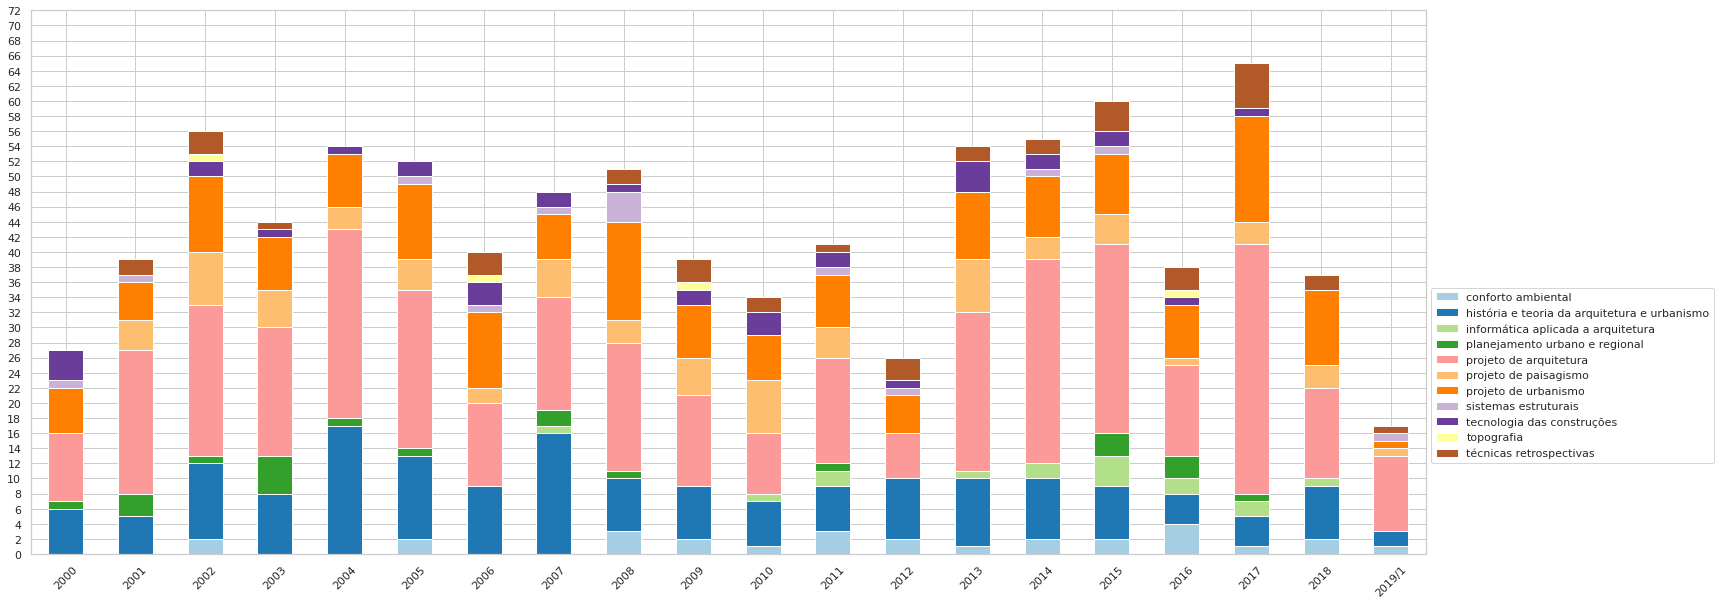

In [ ]:
splot = df2.iloc[0:].plot.bar(figsize=(25, 10), rot=45, subplots=False, sharex=False, sharey='row', 
                              stacked=True, 
                              colormap='Paired');

_ = plt.yticks(np.arange(0, 74, step=2))  
_ = plt.subplots_adjust(hspace=.5)
_ = plt.legend(loc='top left', bbox_to_anchor=(1, 0.5))

No handles with labels found to put in legend.


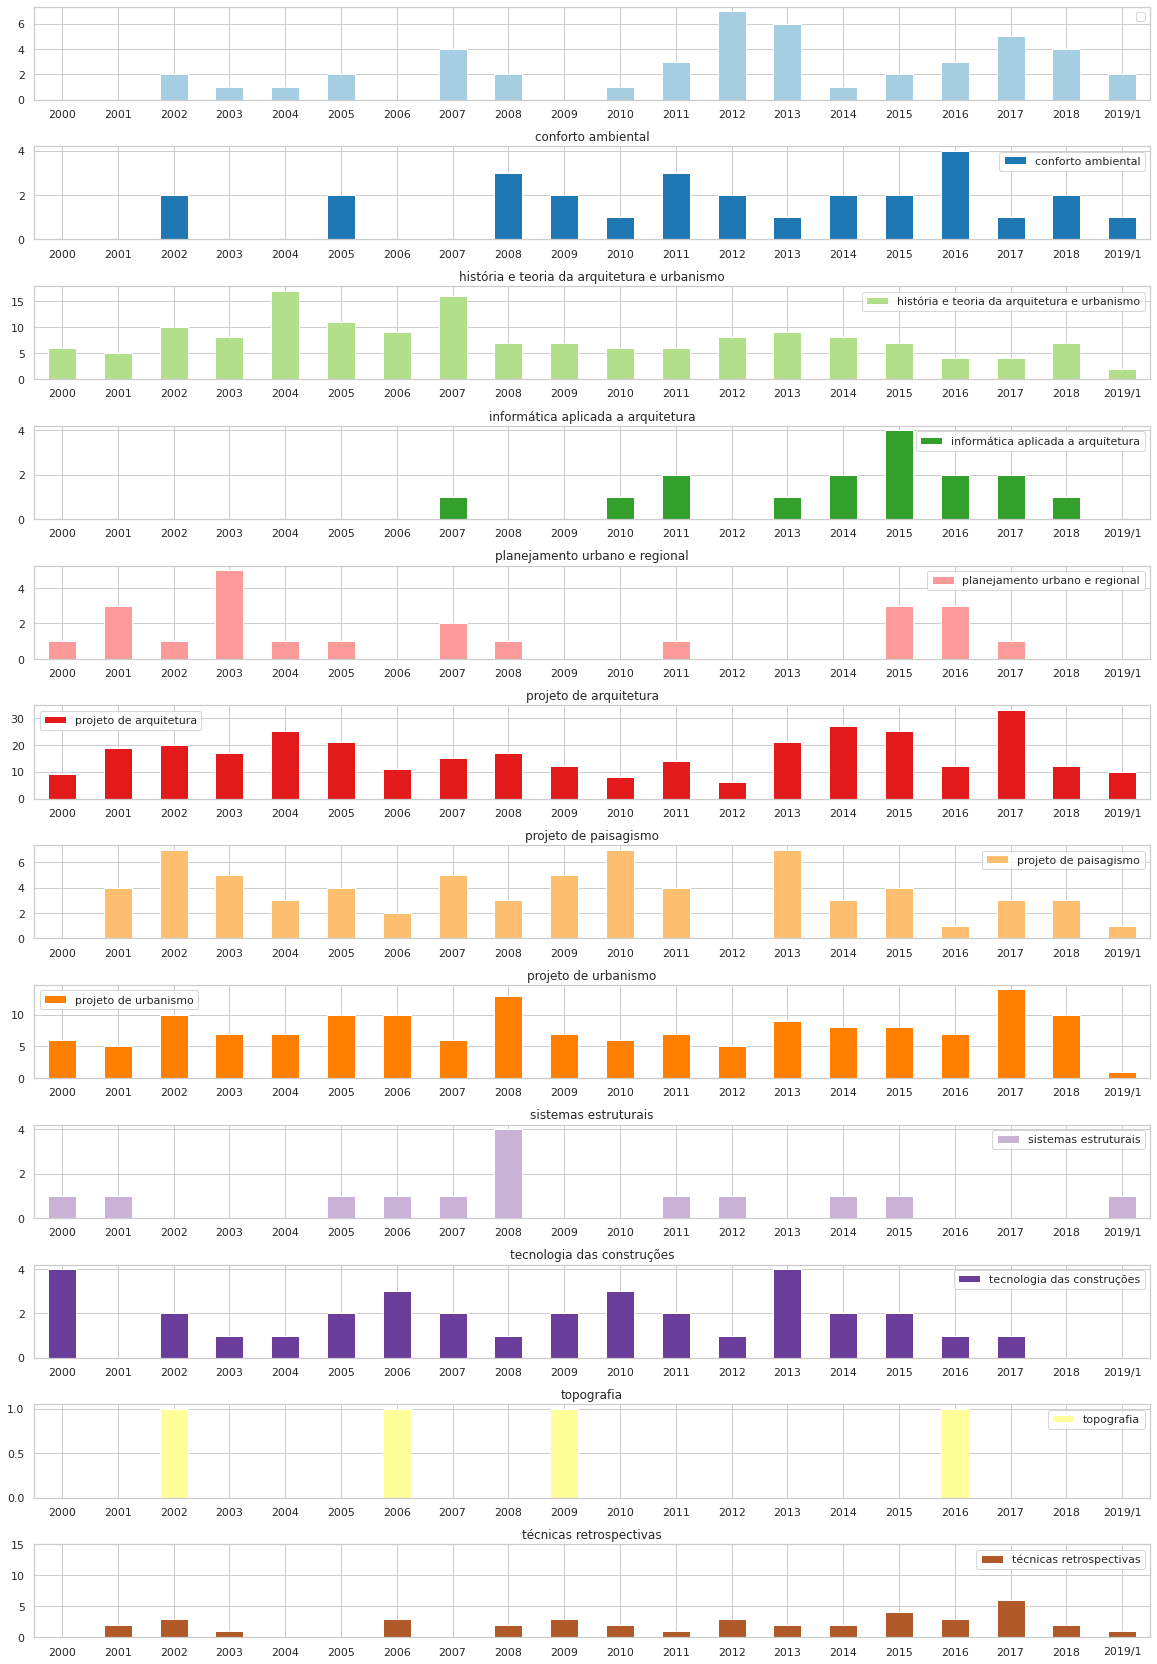

In [ ]:
_= sns.set_context('paper')
_= sns.set(style="whitegrid")
# ax = sns.barplot(x="index", y="total_bill", hue="sex", data=tips)
df2 = pd.DataFrame(contadores, columns=list(set_dnc), index=anos)
splot = df2.plot.bar(figsize=(20, 30), rot=0, subplots=True, sharex=False, sharey=False, colormap='Paired');
_ = plt.yticks(np.arange(0, 20, step=5))
_ = plt.subplots_adjust(hspace=.5)
# _ = plt.legend(loc='top left', bbox_to_anchor=(1.0, 0.5))

No handles with labels found to put in legend.


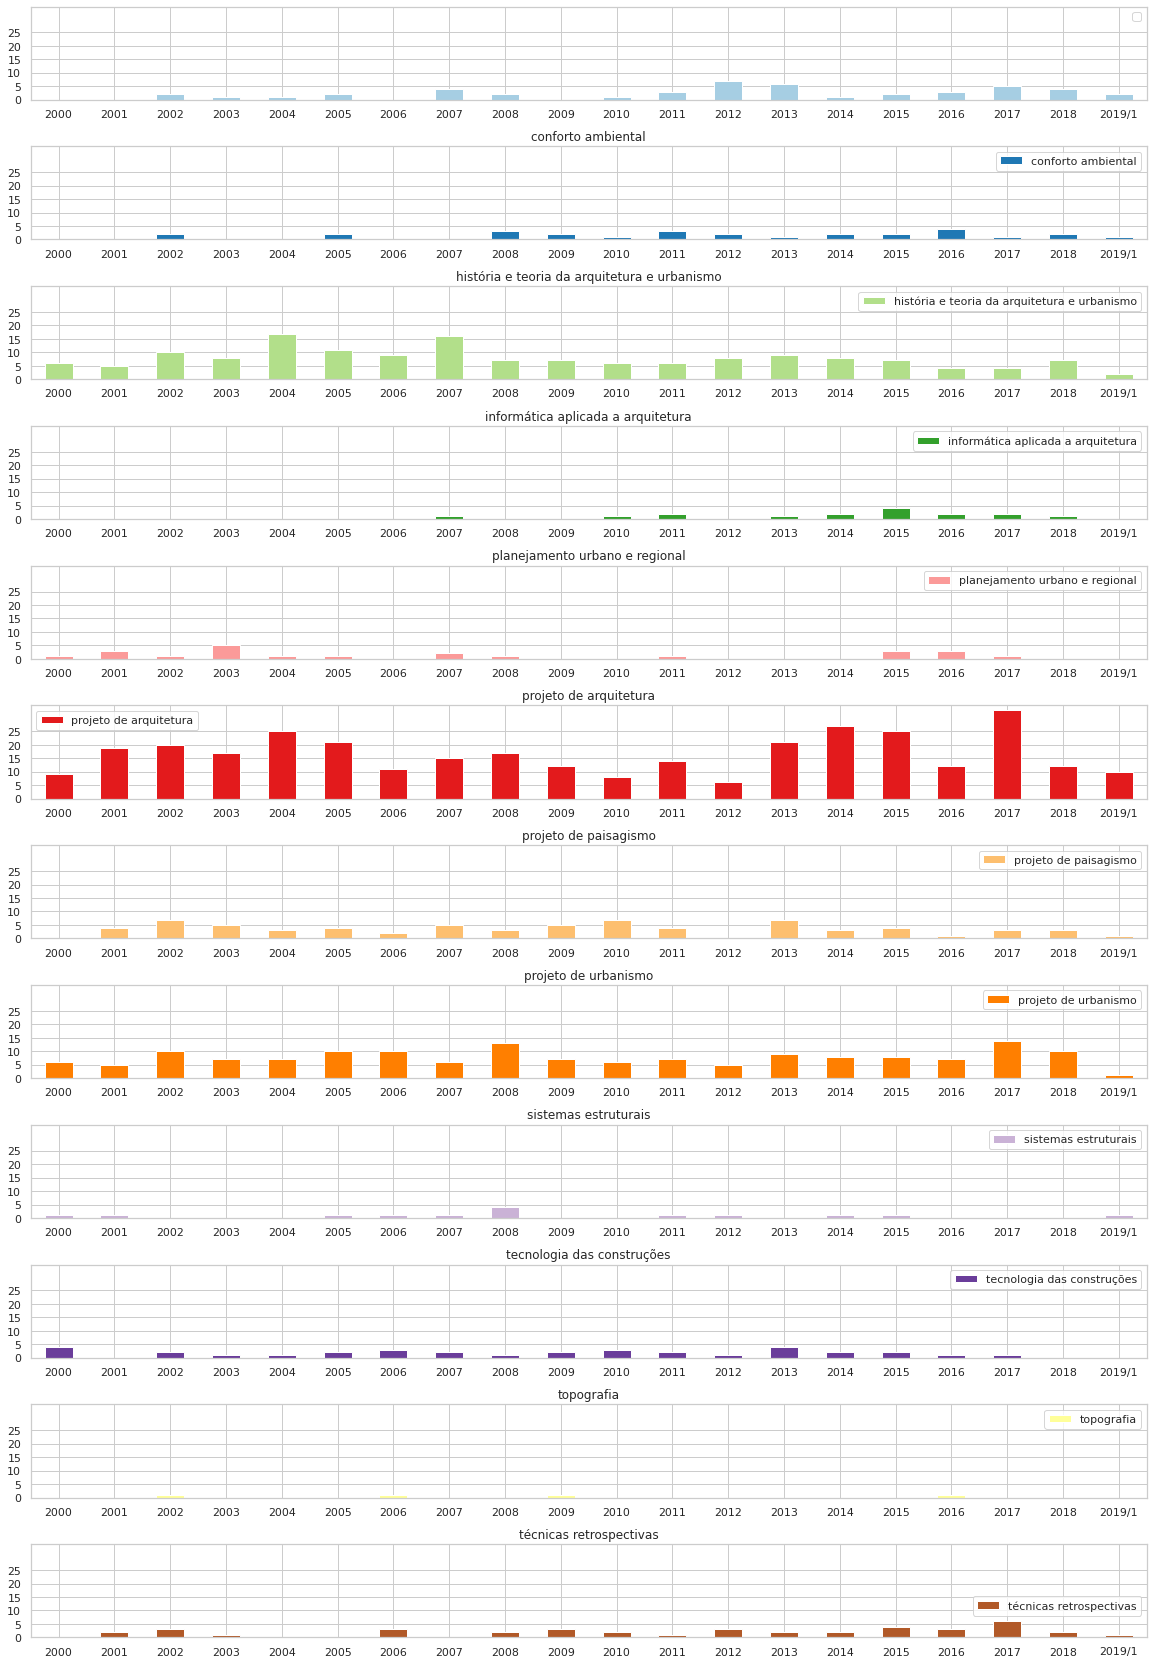

In [ ]:
_= sns.set_context('paper')
_= sns.set(style="whitegrid")
# ax = sns.barplot(x="index", y="total_bill", hue="sex", data=tips)
df2 = pd.DataFrame(contadores, columns=list(set_dnc), index=anos)
splot = df2.plot.bar(figsize=(20, 30), rot=0, subplots=True, sharex=False, sharey=True, colormap='Paired');
_ = plt.yticks(np.arange(0, 30, step=5))  
_ = plt.subplots_adjust(hspace=.5)
_ = plt.legend(loc='top left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
set_lugar = set(df['Orientador'])
set_lugar = sorted(list(set_lugar))

for tag in set_lugar:
  result = df[df['Orientador'] == tag]
  print(tag, result.shape[0])


 13
abe, andre 1
abe, andre tomoyuki 2
abe, andré 7
abe, andré t. 1
abe, andré tomouyki 1
abe, andré tomoyuk 1
abe, andré tomoyuke 1
abe, andré tomoyuke. 1
abe, andré tomoyuki 31
abe, andré tomoyuki, universidade federal do 1
abe, andré tomoyuki. 2
abe, andré tomoyuky. 1
abe, andré tomyuki 1
abe, andré. 2
alexandre, adriano stelzer 1
almanara, rogério 1
almeida , renata hermanny de 1
almeida, lutero 1
almeida, lutero proscholdt 3
almeida, lutero prostcholdt 1
almeida, lutero pröschodt 1
almeida, lutero pröscholdt 1
almeida, lutero pröscholdt. 1
almeida, renata 1
almeida, renata hermanny 3
almeida, renata hermanny de 30
almeida, renata hermanny de. 8
almeida, renata hermanny de., 1
almeida, renata hermany 1
almeida, renata hermany de 1
almeida, renata hermmany, 1
almeida,renata hermanny 1
almeida,renata hermanny de 2
almeira , renata hermanny de 1
almenara ribeiro, rogério. 1
almenara, rogerio 2
almenara, rogerio. 1
almenara, rogéiro 1
almenara, rogério 24
almenara, rogério ribeiro 3
al

In [ ]:
set_lugar = set(df['Ano da publicação'])
set_lugar = list(set_lugar)

for tag in set_lugar:
  result = df[df['Ano da publicação'] == tag]
  print(tag, result.shape[0])

2016 41
2017 70
2018 41
2019 19
2000 27
2001 39
2002 58
2003 45
2004 55
2005 54
2006 40
2007 52
2008 53
2009 39
2010 35
2011 44
2012 33
2013 60
2014 56
2015 62


## Análise de lugares

In [ ]:
!pip install chart_studio 
!pip install plotly

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
set_lugar = set(df['LUGAR'])
set_lugar = sorted(list(set_lugar))

for tag in set_lugar:
  result = df[df['LUGAR'].str.contains(pat=tag)]
  print(tag, result.shape[0])

 923
aeroporto 5
alfredo chaves 1
alice coutinho 1
anchieta 2
andorinhas 3
antártica 3
aracruz 2
araçás (rod. darly santos) 0
argolas 2
atenas 1
atlântica ville 1
bairro grande vitória 1
bairro rio marinho 1
baixo guandú 2
barcelona 1
barra do itapemirim 1
barra do jucu 5
barro vermelho 2
barão de cocais 1
baía de vitória 2
bela vista 2
bela vista (ilha da pólvora) 0
bento ferreira 10
boa vista ii 1
brasil 3
cabo verde 1
cachoeiro de itapemirim 2
campo grande 2
campo verde 1
canal da costa 2
canal da passagem 7
carapina 6
cariacica 5
cariacica (br 262) 0
cariacica sede 1
carmo do rio claro 1
castelo 5
centro de colatina 11
centro de domingos martins 3
centro de guarapari 7
centro de linhares 3
centro de vila velha 6
centro de vitória 45
cidade continental 1
civit ii 2
cobilândia (rod. carlos lindemberg) 0
colatina (rio doce) 0
comdusa 1
conceição da barra 2
conceição do castelo 1
conquista 2
consolação 1
continente latinoamericano 1
coqueiral de itaparica 1
de fátima 1
divino espírito 

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly.express as px

cities = pd.read_excel('/gdrive/My Drive/Natasha/PGs Locais com coordenadas.xlsx')

location_dict = {'n/d': {'latitude': 0, 'longitude': 0}, '': {'latitude': 0, 'longitude': 0}}

def add_entry(row, location_dict):
    location_dict[str(row['Bairro']).strip().lower()] = {'latitude': row['Latidude'], 'longitude': row['Longitude']}

cities.apply(lambda row: add_entry(row, location_dict), axis=1)

df['Latitude'] = df['LUGAR'].apply(lambda row: location_dict[str(row).lower()]['latitude'])
df['Longitude'] = df['LUGAR'].apply(lambda row: location_dict[str(row).lower()]['longitude'])

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Titulo", hover_data=["Titulo", 'Ano da publicação', 'LUGAR'],
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=2, height=1000, size_max=30)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly.express as px

cities = pd.read_excel('/gdrive/My Drive/Natasha/PGs Locais com coordenadas.xlsx')

location_dict = {'n/d': {'latitude': 0, 'longitude': 0}, '': {'latitude': 0, 'longitude': 0}}

def add_entry(row, location_dict):
    location_dict[str(row['Bairro']).strip().lower()] = {'latitude': row['Latidude'], 'longitude': row['Longitude']}

cities.apply(lambda row: add_entry(row, location_dict), axis=1)

df['Latitude'] = df['LUGAR'].apply(lambda row: location_dict[str(row).lower()]['latitude'])
df['Longitude'] = df['LUGAR'].apply(lambda row: location_dict[str(row).lower()]['longitude'])

df_lugares = df.groupby('LUGAR').agg({'Titulo': list, 'Latitude':'first', 'Longitude':'first' }).reset_index()
df_lugares['Tamanho'] = df_lugares['Titulo'].apply(lambda x: len(x))
df_lugares = df_lugares[ df_lugares['LUGAR'] != "" ]
df_lugares = df_lugares[ df_lugares['LUGAR'] != "n/d" ]

fig = px.scatter_mapbox(df_lugares, lat="Latitude", lon="Longitude", hover_name="LUGAR", hover_data=["Tamanho"],
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=2, height=1000, size_max=50, size="Tamanho")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
df_lugares['Titulo'].iloc[0:1].apply(lambda x: len(x.split("; ")))

AttributeError: ignored

In [ ]:
df_lugares = df_lugares[ df_lugares['LUGAR'] != "" ]
df_lugares = df_lugares[ df_lugares['LUGAR'] != "n/d" ]


In [ ]:
df_lugares